In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

In [2]:
df=pd.read_csv('Crimes_-_2022.csv',sep=',',delimiter=',',low_memory=False)


In [3]:
#REMOVING ID(1), CASE_NUMBER(2), BLOCK(4), BEAT(11), DISTRICT(12), WARD(13), 
#Community Area (14), FBI Code (15), X Coordinate (16), Y Coordinate (17), 
#Updated On (19), Latitude (20), Longitude (21)
columsdrop=[0,1,4,10,11,14,15,16,17,18,21]
df=df.drop(df.columns[columsdrop],axis=1)
df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Community Area,Latitude,Longitude
0,08/09/2022 04:07:00 PM,014XX W ELMDALE AVE,ROBBERY,VEHICULAR HIJACKING,STREET,True,False,48.0,77,41.990846,-87.666096
1,08/10/2022 04:00:00 PM,062XX S ARTESIAN AVE,THEFT,OVER $500,STREET,False,False,16.0,66,41.780331,-87.684892
2,08/11/2022 10:00:00 AM,094XX S STATE ST,THEFT,OVER $500,STREET,False,True,9.0,49,41.722303,-87.623745
3,08/15/2022 09:14:00 PM,048XX S KARLOV AVE,ASSAULT,SIMPLE,RESIDENCE,False,False,14.0,57,41.805347,-87.725961
4,08/16/2022 04:10:00 PM,015XX S HALSTED ST,THEFT,$500 AND UNDER,SIDEWALK,False,False,11.0,28,41.860250,-87.646715


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238320 entries, 0 to 238319
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  238320 non-null  object 
 1   Block                 238320 non-null  object 
 2   Primary Type          238320 non-null  object 
 3   Description           238320 non-null  object 
 4   Location Description  237543 non-null  object 
 5   Arrest                238320 non-null  bool   
 6   Domestic              238320 non-null  bool   
 7   Ward                  238310 non-null  float64
 8   Community Area        238320 non-null  int64  
 9   Latitude              233119 non-null  float64
 10  Longitude             233119 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(5)
memory usage: 16.8+ MB


In [14]:
df.iloc[:,2].unique()

array(['ROBBERY', 'THEFT', 'ASSAULT', 'BATTERY', 'MOTOR VEHICLE THEFT',
       'OTHER OFFENSE', 'CRIMINAL DAMAGE', 'INTIMIDATION', 'NARCOTICS',
       'ARSON', 'BURGLARY', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
       'STALKING', 'HOMICIDE', 'OBSCENITY', 'WEAPONS VIOLATION',
       'OFFENSE INVOLVING CHILDREN', 'CRIMINAL SEXUAL ASSAULT',
       'CONCEALED CARRY LICENSE VIOLATION', 'PUBLIC PEACE VIOLATION',
       'SEX OFFENSE', 'KIDNAPPING', 'INTERFERENCE WITH PUBLIC OFFICER',
       'LIQUOR LAW VIOLATION', 'OTHER NARCOTIC VIOLATION',
       'HUMAN TRAFFICKING', 'PROSTITUTION', 'GAMBLING', 'NON-CRIMINAL',
       'PUBLIC INDECENCY'], dtype=object)

## TIME

In [20]:
df.groupby(['Community Area','Primary Type'])['Date'].count()

Community Area  Primary Type                     
1               ARSON                                  6
                ASSAULT                              310
                BATTERY                              746
                BURGLARY                             133
                CONCEALED CARRY LICENSE VIOLATION      1
                                                    ... 
77              ROBBERY                               95
                SEX OFFENSE                           20
                STALKING                               9
                THEFT                                917
                WEAPONS VIOLATION                     13
Name: Date, Length: 1796, dtype: int64

In [23]:
d=pd.to_datetime(df.iloc[:,0])

In [39]:
d[0].hour

16

In [41]:
for i in range(len(df)):
    df.loc[i,'Month']=d[i].month
    df.loc[i,'Day']=d[i].day
    df.loc[i,'Hour']=d[i].hour

In [42]:
df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Community Area,Latitude,Longitude,Month,Day,Hour
0,08/09/2022 04:07:00 PM,014XX W ELMDALE AVE,ROBBERY,VEHICULAR HIJACKING,STREET,True,False,48.0,77,41.990846,-87.666096,8.0,9.0,16.0
1,08/10/2022 04:00:00 PM,062XX S ARTESIAN AVE,THEFT,OVER $500,STREET,False,False,16.0,66,41.780331,-87.684892,8.0,10.0,16.0
2,08/11/2022 10:00:00 AM,094XX S STATE ST,THEFT,OVER $500,STREET,False,True,9.0,49,41.722303,-87.623745,8.0,11.0,10.0
3,08/15/2022 09:14:00 PM,048XX S KARLOV AVE,ASSAULT,SIMPLE,RESIDENCE,False,False,14.0,57,41.805347,-87.725961,8.0,15.0,21.0
4,08/16/2022 04:10:00 PM,015XX S HALSTED ST,THEFT,$500 AND UNDER,SIDEWALK,False,False,11.0,28,41.860250,-87.646715,8.0,16.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238315,06/27/2022 10:05:00 AM,025XX N HALSTED ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,43.0,7,41.927817,-87.648846,6.0,27.0,10.0
238316,12/22/2022 06:00:00 PM,020XX W CORNELIA AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,32.0,5,41.945022,-87.680072,12.0,22.0,18.0
238317,12/19/2022 02:00:00 PM,044XX N ROCKWELL ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,47.0,4,41.962532,-87.693611,12.0,19.0,14.0
238318,12/20/2022 06:45:00 AM,027XX W ROOSEVELT RD,THEFT,OVER $500,STREET,False,False,28.0,29,41.866517,-87.695179,12.0,20.0,6.0


In [86]:
df.to_csv('chicago_hours.csv')

## DROPPED TENTATIVES

In [87]:
man=df.groupby(['Day','Month', 'Hour'])['Block'].count()

In [88]:
man=pd.DataFrame(man)
man

Block
Day  Month Hour       
1.0  1.0   0.0     179
           1.0      53
           2.0      41
           3.0      42
           4.0      40
...                ...
31.0 12.0  19.0     28
           20.0     41
           21.0     42
           22.0     31
           23.0     47

[8759 rows x 1 columns]

In [89]:
man=man.pivot_table(values='Block', index=['Day', 'Month'], columns='Hour')


In [90]:
hours=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
man=man.reset_index()
man=man.iloc[:,2:]
man

Hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
0,179.0,53.0,41.0,42.0,40.0,22.0,17.0,16.0,19.0,29.0,...,28.0,13.0,19.0,14.0,19.0,16.0,14.0,27.0,15.0,12.0
1,83.0,13.0,16.0,6.0,11.0,7.0,13.0,24.0,20.0,34.0,...,23.0,36.0,44.0,32.0,30.0,32.0,20.0,23.0,14.0,18.0
2,100.0,8.0,10.0,12.0,6.0,3.0,15.0,16.0,23.0,44.0,...,30.0,33.0,33.0,40.0,23.0,35.0,34.0,24.0,15.0,23.0
3,110.0,20.0,11.0,17.0,8.0,12.0,9.0,24.0,32.0,43.0,...,40.0,44.0,39.0,36.0,36.0,29.0,22.0,18.0,32.0,23.0
4,111.0,25.0,28.0,24.0,11.0,13.0,8.0,17.0,18.0,34.0,...,30.0,22.0,30.0,26.0,32.0,28.0,25.0,33.0,36.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,63.0,24.0,21.0,24.0,11.0,11.0,15.0,20.0,21.0,24.0,...,25.0,34.0,34.0,31.0,34.0,37.0,35.0,33.0,33.0,30.0
361,67.0,41.0,39.0,23.0,22.0,18.0,23.0,16.0,20.0,20.0,...,17.0,33.0,34.0,39.0,42.0,42.0,46.0,50.0,45.0,25.0
362,72.0,9.0,22.0,13.0,7.0,13.0,9.0,27.0,29.0,40.0,...,28.0,44.0,43.0,39.0,40.0,34.0,34.0,38.0,30.0,26.0
363,55.0,26.0,18.0,14.0,11.0,5.0,14.0,25.0,23.0,34.0,...,40.0,34.0,39.0,52.0,54.0,55.0,31.0,51.0,35.0,28.0


In [100]:
man.describe()

Hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
count,365.000000,365.000000,364.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,55.978082,20.868493,18.818681,15.717808,12.824658,10.879452,11.800000,16.613699,22.389041,27.747945,...,29.887671,34.202740,33.323288,34.616438,33.608219,33.430137,32.326027,30.345205,28.860274,25.682192
std,19.649946,8.713966,7.905787,6.934532,5.790001,4.250629,4.121906,5.172978,6.054867,7.110743,...,6.493952,7.986767,7.152547,7.405133,7.500362,7.920877,7.755219,8.322237,7.698629,7.807635
min,21.000000,5.000000,4.000000,3.000000,1.000000,1.000000,3.000000,2.000000,8.000000,8.000000,...,12.000000,13.000000,15.000000,14.000000,14.000000,13.000000,13.000000,11.000000,11.000000,8.000000
25%,42.000000,14.000000,13.000000,11.000000,9.000000,8.000000,9.000000,13.000000,18.000000,23.000000,...,25.000000,28.000000,28.000000,30.000000,28.000000,28.000000,27.000000,24.000000,23.000000,19.000000
50%,53.000000,20.000000,17.000000,14.000000,12.000000,10.000000,11.000000,17.000000,22.000000,28.000000,...,30.000000,34.000000,33.000000,34.000000,33.000000,33.000000,32.000000,30.000000,29.000000,25.000000
75%,67.000000,26.000000,23.000000,20.000000,16.000000,14.000000,14.000000,20.000000,26.000000,32.000000,...,34.000000,39.000000,38.000000,39.000000,38.000000,38.000000,38.000000,36.000000,34.000000,31.000000
max,179.000000,53.000000,44.000000,44.000000,40.000000,26.000000,24.000000,35.000000,44.000000,57.000000,...,53.000000,58.000000,58.000000,59.000000,56.000000,66.000000,61.000000,66.000000,57.000000,47.000000


In [123]:
def plotLogTransformed(df,x):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))
    ax1 = axes[0,0]
    ax2 = axes[0,1]
    ax3 = axes[1,0]
    ax4 = axes[1,1]
    ax5 = axes[0,2]
    ax6 = axes[1,2]

    d=df.iloc[:,x]
    transformed_data, lambda_value = stats.boxcox(d+1)
    
    # Istogramma della variabile
    sns.histplot(d, bins=40, kde=True, color="blue",ax=ax1)


    # Istogramma della variabile trasformata logaritmicamente
    sns.histplot(np.log10(d+1), bins=40, kde=True, color="red",ax=ax2)

    
    sns.histplot(transformed_data, bins=40, kde=True, color="green",ax=ax5)

    
      

    stats.probplot(d,  plot=ax3)
    

    stats.probplot(np.log10(d+1),  plot=ax4)
    
    stats.probplot(transformed_data,plot=ax6)

    

    # Mostra il grafico
    plt.show()

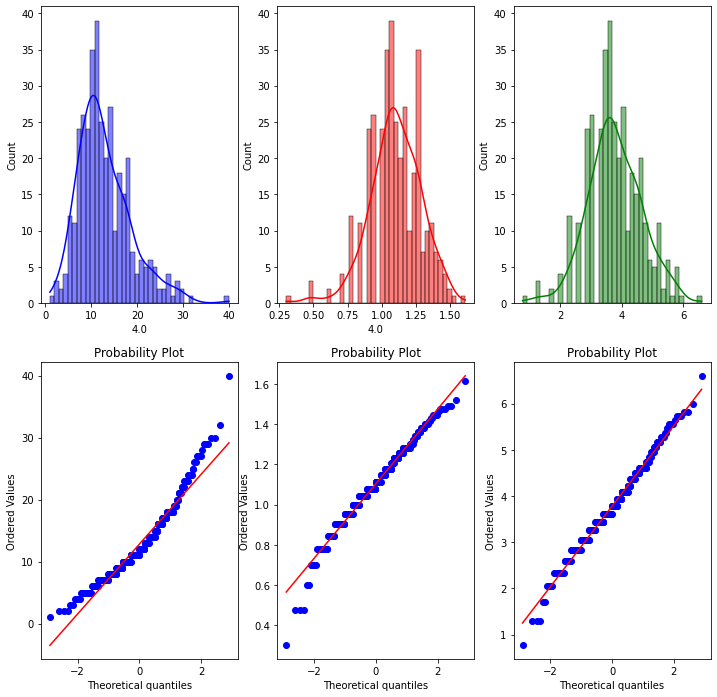

In [126]:
plotLogTransformed(man, 4)

In [101]:
man.to_csv('hourbyhour.csv')

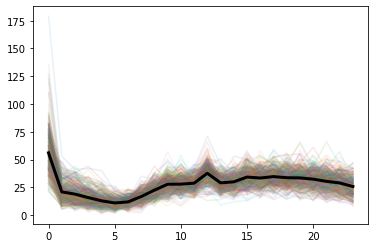

In [111]:
fig, ax = plt.subplots()
for i in range(len(man)):
    ax.plot(man.iloc[i,:],alpha=0.1)
ax.plot(man.mean(), color='black', linewidth=3)
plt.show()

## ARREST RATE AND CRIMES AGGREGATION

In [4]:
h=pd.read_csv('chicago_hours.csv')
h.head()

,Unnamed: 0,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Community Area,Latitude,Longitude,Month,Day,Hour
0,0,08/09/2022 04:07:00 PM,014XX W ELMDALE AVE,ROBBERY,VEHICULAR HIJACKING,STREET,True,False,48.0,77,41.990846,-87.666096,8.0,9.0,16.0
1,1,08/10/2022 04:00:00 PM,062XX S ARTESIAN AVE,THEFT,OVER $500,STREET,False,False,16.0,66,41.780331,-87.684892,8.0,10.0,16.0
2,2,08/11/2022 10:00:00 AM,094XX S STATE ST,THEFT,OVER $500,STREET,False,True,9.0,49,41.722303,-87.623745,8.0,11.0,10.0
3,3,08/15/2022 09:14:00 PM,048XX S KARLOV AVE,ASSAULT,SIMPLE,RESIDENCE,False,False,14.0,57,41.805347,-87.725961,8.0,15.0,21.0
4,4,08/16/2022 04:10:00 PM,015XX S HALSTED ST,THEFT,$500 AND UNDER,SIDEWALK,False,False,11.0,28,41.860250,-87.646715,8.0,16.0,16.0


In [5]:
arrest_rate=h.groupby('Community Area')['Arrest'].mean()
arrest_rate

Community Area
1     0.122363
2     0.078774
3     0.090791
4     0.078109
5     0.045555
        ...   
73    0.100820
74    0.093458
75    0.117413
76    0.290988
77    0.088827
Name: Arrest, Length: 77, dtype: float64

In [6]:
len(h['Community Area'].unique())

77

In [7]:
t=h.groupby(['Community Area','Primary Type','Arrest']).count().pivot_table(values='Block', index='Community Area', columns='Primary Type')

In [8]:
ar=h.groupby(['Community Area','Primary Type'])['Arrest'].mean()

In [9]:
t.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Community Area,,,,,,,,,,,,,,,,,,,,,
1,3.0,155.0,373.0,66.5,1.0,203.5,18.5,43.0,119.5,NaN,...,1.0,124.0,NaN,NaN,4.5,68.0,17.0,5.0,627.0,28.0
2,3.5,144.5,294.0,82.0,NaN,247.0,10.0,39.0,261.5,NaN,...,NaN,103.5,NaN,NaN,3.5,66.5,21.0,5.0,481.5,25.5
3,4.0,150.0,319.5,65.0,2.0,186.5,22.5,47.0,173.0,NaN,...,NaN,103.5,NaN,NaN,3.5,56.0,13.5,10.0,627.0,18.0
4,3.0,69.0,150.5,47.0,1.0,120.0,24.0,32.5,107.0,NaN,...,NaN,60.0,NaN,NaN,5.0,18.0,10.0,2.0,309.5,7.5
5,1.0,33.5,69.5,73.0,NaN,68.5,4.5,17.5,172.0,NaN,...,NaN,39.5,NaN,NaN,5.0,19.0,5.0,1.0,237.0,3.5


In [10]:
todrop=['GAMBLING','HUMAN TRAFFICKING','NON-CRIMINAL','OTHER NARCOTIC VIOLATION','PROSTITUTION','PUBLIC INDECENCY']
t=t.drop(todrop, axis=1)

In [11]:
t=t.fillna(0)

In [12]:
t['ArrestRate']=arrest_rate

In [13]:
t.to_csv('tot_crimes_per_CA.csv')

<AxesSubplot:xlabel='Arrest', ylabel='Count'>

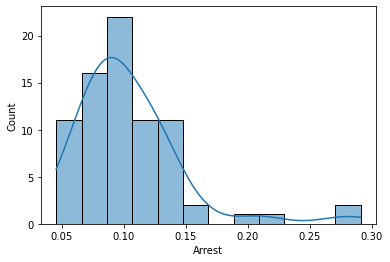

In [14]:
sns.histplot(arrest_rate, kde=True)

In [15]:
p=pd.read_csv('chicago-community-areas.csv', sep=',')
p.head()

,Community Area,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,name,Rogers Park,West Ridge,Uptown,Lincoln Square,North Center,Lake View,Lincoln Park,Near North Side,Edison Park,...,Englewood,Greater Grand Crossing,Ashburn,Auburn Gresham,Beverly,Washington Heights,Mount Greenwood,Morgan Park,O'Hare,Edgewater
1,population,54991,71942,56362,39493,31867,94368,64116,80484,11187,...,30654,32602,41081,48743,20034,26493,19093,22544,12756,56521
2,income,39482,47323,40324,57749,81524,70746,82707,76290,77678,...,19743,29663,62238,34767,83092,42053,80505,56886,49601,43331
3,requests,3204.8880725907,3906.3412193156,2164.0466981295,3827.2605271849,5307.9988703031,2742.2431332668,3408.6655437027,1717.6084687635,4754.6259050653,...,5459.646375673,6296.85295381,5599.4255251814,5785.446115344,6985.125287016,6641.7544256946,4357.6179751737,6264.1944641542,1552.9946691765,2564.8873869877
4,latinos,0.244,0.204,0.142,0.191,0.136,0.076,0.056,0.049,0.078,...,0.011,0.012,0.368,0.009,0.046,0.01,0.072,0.027,0.095,0.165


In [16]:
p=p.T
p.columns = p.iloc[0]
p = p[1:]

In [17]:
p.to_csv('ca_info.csv')

In [18]:
list(h['Primary Type'].unique())

['ROBBERY',
 'THEFT',
 'ASSAULT',
 'BATTERY',
 'MOTOR VEHICLE THEFT',
 'OTHER OFFENSE',
 'CRIMINAL DAMAGE',
 'INTIMIDATION',
 'NARCOTICS',
 'ARSON',
 'BURGLARY',
 'CRIMINAL TRESPASS',
 'DECEPTIVE PRACTICE',
 'STALKING',
 'HOMICIDE',
 'OBSCENITY',
 'WEAPONS VIOLATION',
 'OFFENSE INVOLVING CHILDREN',
 'CRIMINAL SEXUAL ASSAULT',
 'CONCEALED CARRY LICENSE VIOLATION',
 'PUBLIC PEACE VIOLATION',
 'SEX OFFENSE',
 'KIDNAPPING',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'LIQUOR LAW VIOLATION',
 'OTHER NARCOTIC VIOLATION',
 'HUMAN TRAFFICKING',
 'PROSTITUTION',
 'GAMBLING',
 'NON-CRIMINAL',
 'PUBLIC INDECENCY']

Other Offenses:

Other Offense
Deceptive Practice
Obscenity
Criminal Trespass
Intimidation
Non-Criminal (may include incidents initially reported as crimes but later determined to be non-criminal)

In [19]:
violent=['HOMICIDE', 'ASSAULT', 'BATTERY','SEX OFFENSE','STALKING', 'CRIMINAL SEXUAL ASSAULT','KIDNAPPING', 'INTERFERENCE WITH PUBLIC OFFICER']
proper=['THEFT', 'ROBBERY','MOTOR VEHICLE THEFT', 'BURGLARY', 'CRIMINAL DAMAGE', 'ARSON']
drug=['NARCOTICS', 'OTHER NARCOTIC VIOLATION']
public=['PUBLIC PEACE VIOLATION', 'WEAPONS VIOLATION', 'OBSCENITY', 'INTIMIDATION', 'OFFENSE INVOLVING CHILDREN', 'CONCEALED CARRY LICENSE VIOLATION', 'PROSTITUTION', 'GAMBLING', 'LIQUOR LAW VIOLATION', 'PUBLIC INDECENCY', 'HUMAN TRAFFICKING']
others=['OTHER OFFENSE', 'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'NON-CRIMINAL','GAMBLING']

In [20]:
df=pd.read_csv('tot_crimes_per_CA.csv')
df

,Community Area,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,ArrestRate
0,1,3.0,155.0,373.0,66.5,1.0,203.5,18.5,43.0,119.5,...,1.0,24.0,124.0,4.5,68.0,17.0,5.0,627.0,28.0,0.122363
1,2,3.5,144.5,294.0,82.0,0.0,247.0,10.0,39.0,261.5,...,3.0,11.0,103.5,3.5,66.5,21.0,5.0,481.5,25.5,0.078774
2,3,4.0,150.0,319.5,65.0,2.0,186.5,22.5,47.0,173.0,...,0.0,5.5,103.5,3.5,56.0,13.5,10.0,627.0,18.0,0.090791
3,4,3.0,69.0,150.5,47.0,1.0,120.0,24.0,32.5,107.0,...,1.0,3.5,60.0,5.0,18.0,10.0,2.0,309.5,7.5,0.078109
4,5,1.0,33.5,69.5,73.0,0.0,68.5,4.5,17.5,172.0,...,2.0,2.5,39.5,5.0,19.0,5.0,1.0,237.0,3.5,0.045555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,8.0,127.0,243.5,59.5,2.0,189.0,12.0,16.5,77.5,...,1.0,17.0,102.5,2.0,63.0,9.0,5.0,238.0,60.0,0.100820
73,74,0.0,20.0,42.5,22.0,0.0,26.5,3.0,13.5,37.5,...,1.0,5.0,23.0,1.0,8.0,3.0,1.0,54.5,3.5,0.093458
74,75,1.5,69.5,150.0,26.5,1.0,110.5,4.0,16.5,62.5,...,1.0,29.0,58.0,4.0,47.0,3.5,5.0,195.5,32.5,0.117413
75,76,0.0,49.5,113.0,7.0,29.0,57.5,10.0,85.0,65.5,...,0.0,3.5,47.5,11.0,5.5,8.0,2.0,282.0,4.5,0.290988


In [21]:
len(ar[3])

22

In [25]:
d=pd.DataFrame()

In [26]:
for i in range(77):
    d.loc[i,'Violent']=0
    d.loc[i,'ViolentAR']=0
    d.loc[i,'Property']=0
    d.loc[i,'PropertyAR']=0
    d.loc[i,'Drugs']=0
    d.loc[i,'DrugsAR']=0
    d.loc[i,'Public']=0
    d.loc[i,'PublicAR']=0
    d.loc[i,'Others']=0
    d.loc[i,'OthersAR']=0
    for x in ar[i+1].index.difference(todrop):
        if x in violent:
            d.loc[i,'Violent']=d.loc[i,'Violent']+df.loc[i,x]
            d.loc[i,'ViolentAR']=d.loc[i,'ViolentAR']+df.loc[i,x]*ar[i+1][x]
        if x in proper:
            d.loc[i,'Property']=d.loc[i,'Property']+df.loc[i,x]
            d.loc[i,'PropertyAR']=d.loc[i,'PropertyAR']+df.loc[i,x]*ar[i+1][x]
        if x in drug:
            d.loc[i,'Drugs']=d.loc[i,'Drugs']+df.loc[i,x]
            d.loc[i,'DrugsAR']=d.loc[i,'DrugsAR']+df.loc[i,x]*ar[i+1][x]
        if x in public:
            d.loc[i,'Public']=d.loc[i,'Public']+df.loc[i,x]
            d.loc[i,'PublicAR']=d.loc[i,'PublicAR']+df.loc[i,x]*ar[i+1][x]
        if x in others:
            d.loc[i,'Others']=d.loc[i,'Others']+df.loc[i,x]
            d.loc[i,'OthersAR']=d.loc[i,'OthersAR']+df.loc[i,x]*ar[i+1][x]
    d.loc[i,'ViolentAR']=d.loc[i,'ViolentAR']/d.loc[i,'Violent']
    d.loc[i,'PropertyAR']=d.loc[i,'PropertyAR']/d.loc[i,'Property']
    d.loc[i,'DrugsAR']=d.loc[i,'DrugsAR']/d.loc[i,'Drugs']
    d.loc[i,'PublicAR']=d.loc[i,'PublicAR']/d.loc[i,'Public']
    d.loc[i,'OthersAR']=d.loc[i,'OthersAR']/d.loc[i,'Others']

In [27]:
d['Community Area']=df['Community Area']
d

,Violent,ViolentAR,Property,PropertyAR,Drugs,DrugsAR,Public,PublicAR,Others,OthersAR,Community Area
0,577.0,0.151646,1069.5,0.069659,29.0,0.879310,71.5,0.377622,286.5,0.120419,1
1,480.5,0.148803,1029.5,0.034968,18.0,0.888889,50.0,0.310000,404.0,0.047030,2
2,524.0,0.143130,1046.5,0.040134,26.0,1.000000,32.0,0.562500,323.5,0.092736,3
3,258.5,0.156673,545.5,0.028414,5.5,0.909091,23.0,0.391304,199.5,0.057644,4
4,113.5,0.088106,496.5,0.019134,7.0,1.000000,15.0,0.200000,229.0,0.026201,5
...,...,...,...,...,...,...,...,...,...,...,...
72,408.5,0.111383,777.0,0.026384,15.5,0.903226,84.0,0.666667,196.5,0.083969,73
73,71.5,0.132867,133.0,0.018797,12.0,1.000000,12.5,0.320000,74.0,0.054054,74
74,241.0,0.116183,469.5,0.053248,12.0,0.958333,68.5,0.474453,137.0,0.069343,75
75,185.5,0.175202,413.5,0.048368,172.0,1.000000,48.0,0.718750,198.0,0.479798,76


In [28]:
d.to_csv('Tot_AR_CA.csv')

In [29]:
t['Violent']=np.zeros(77)
for x in violent:
    t['Violent']=t['Violent']+t[x]
    t['ViolentAR']=

SyntaxError: invalid syntax (<ipython-input-29-7bcba0c35fb6>, line 4)

In [ ]:
t['Property']=np.zeros(77)
for x in proper:
    t['Property']=t['Property']+t[x]

In [ ]:
t['Drugs']=np.zeros(77)
for x in drug:
    t['Drugs']=t['Drugs']+t[x]

In [ ]:
t['Public']=np.zeros(77)
for x in public:
    t['Public']=t['Public']+t[x]

In [ ]:
t['Others']=np.zeros(77)
for x in others:
    t['Others']=t['Others']+t[x]

In [ ]:
t[['Violent','Property','Drugs','Public','Others', 'ArrestRate']].to_csv('agglomerate_crimes.csv')